### **IE529 - FINAL PROJECT - CODE FILE**

Below, we have performed KMeans++ algorithm on the MNIST dataset to viusalize the clustering process. Steps for the algorithm is given below.

1) We import all the required libraries and load the MNIST dataset initally.

2) Once the dataset is loaded, we determine the total number of samples and features. After this, we extract the number of unique digits which shows the total number of unqiue labels

3) We then apply PCA to reduce dimensionallty to 2 Principal components to visualize the clusters easily and to reduce computational time.

4) We perfomed the elbow method to identify the number of optimal clusters.

5) We run the Kmeans++ algorithm on the dataset with n = 10 since we know that the MNSIT contains 10 unique digits and we want to check how well the algorithm would perform.

6) Silhouette score is calculated to assess how well the cluster performs.

7) We then visualize the different clusters that are formed.

## **K-MEANS++ ALGORITHM FOR MNSIT DATASET**

First few rows of the scaled data:
[[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
  -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
  -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
   0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
  -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
   1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
  -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
   0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
  -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
  -0.75743581 -0.20978513 -0.02359646 -0.29908135  0.08671869  0.20829258
  -0.36677122 -1.14664746 -0.5056698  -0.19600752]
 [ 0.         -0.33501649 -1.09493684  0.03864775  0.26875116 -0.13801953
  -0.40972392 -0.12502292 -0.05907756 -0.62400926 -1.91557297 -0.24630352
   1.19644995  0.13619465 -

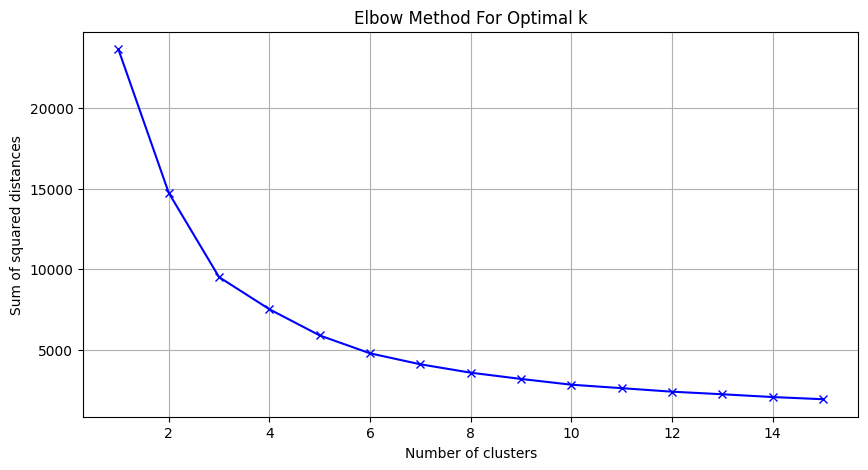

Silhouette Score for KMeans++: 0.37194497119354797


<ipython-input-10-154a3c1f7d5b>:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral', 10))


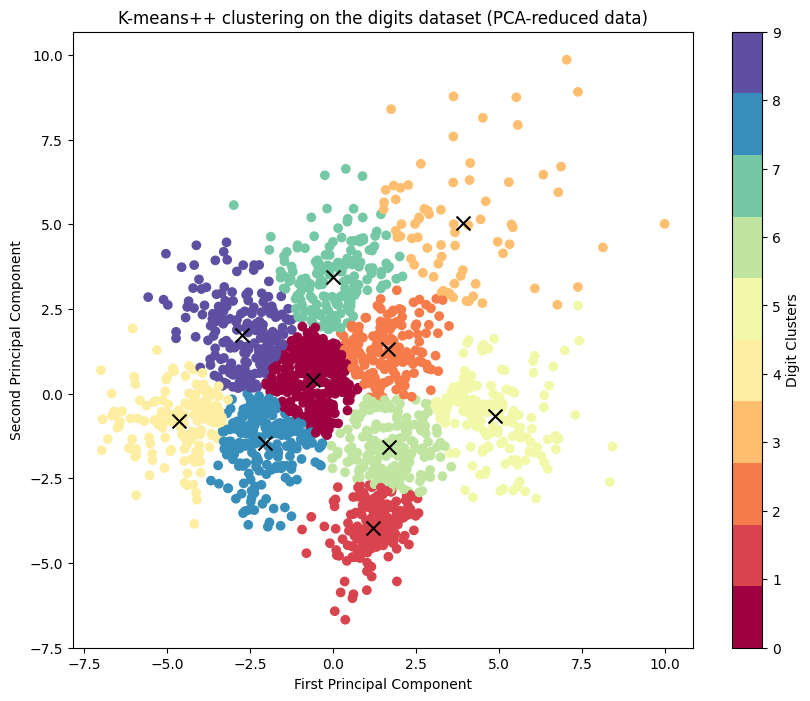

In [ ]:
#KMEANS++ ALGORITHM

#Importing all the required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Random seed for reproducing the results
np.random.seed(42)

# Loading the MNSIT Digit dataset and normalizng it by scaling
digits = load_digits()
data = scale(digits.data)

# Printing first few rows
print("First few rows of the scaled data:")
print(data[:5])

# Identifying the number of samples, and total number of unique digits and unique labels in the dataset
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

# PCA is done to reduce dimensionallity and makes it better for visualizing the results
reduced_data = PCA(n_components=2).fit_transform(data)

# Considering a range of clusters for the elbow plot
range_n_clusters = range(1, 16)

# Empty List to store the sum of squared distances for each number of clusters
sum_of_squared_distances = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10)
    kmeans.fit(reduced_data)
    sum_of_squared_distances.append(kmeans.inertia_)

# Elbow plot is done to check the optimal number of clusters
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, sum_of_squared_distances, 'bx-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.grid(True)
plt.show()

# Initialize KMeans clustering with KMeans++
kmeans_plus = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans_plus.fit(reduced_data)  # Fit KMeans on the reduced data

# Centroid is retrieved
centroids_plus = kmeans_plus.cluster_centers_

# Silhouette Score is calculated
score_plus = silhouette_score(reduced_data, kmeans_plus.labels_)
print("Silhouette Score for KMeans++:", score_plus)

# Plotting to visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_plus.labels_,
                       cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='Digit Clusters')  # Add color bar to indicate cluster colors
plt.scatter(centroids_plus[:, 0], centroids_plus[:, 1], marker='x', color='k', s=100)
plt.title('K-means++ clustering on the digits dataset (PCA-reduced data)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


**RESULTS OF KMEANS++**

- The silhouette score for clustering is 0.3719, which shows that the clustering process was good and the clusters are well defined.
- Based on the plot obtained, we can clearly see 10 clusters that are well defined but although some overlap does exist but overall the algorithm performs well.

## **KMEANS PARALLEL ALGORITHM FOR MNSIT DATASET**

For the below code, we ran the Kmeans parallel algorithm to analyze the clustering results. Steps taken to implement the Kmeans Parallel algorithm is given below.

1) Importing all required libraries.

2) Function definition -
- X = Dataset of points to be clustered
- k = number of clusters
- l = oversampling parameter - potential centers to sample in each round.
- r = number of sampling rounds to perform.

3) Center Initialisation
- We begin with an empty center set and then randomly selct the initial center from the dataset 'X' and subsequenlty add it to C.

4) Sampling Rounds
- For each 'r' rounds, we calculate the euclidean distance from each data point in 'X' to the nearest existing center in 'C'.
- Compute the probability of each data point to be chosen as the new center.
- sample 'l' points as new centers based on the above computed probabiliies using weighted sampling and then we add these new centers to 'C'.

5) Center Refinement
- Once all 'r' rounds are finished, we would have a large number of centers in dataset 'C'. We then run the final kmeans++ clustering on this to refine it and reduce the number of centers to the desired nunber of clusters(k).
- We initialise the k-means clustering with these centers and let the algorithm optimize the center positions further.

6) We perform one more round of kmeans clustering over the dataset 'X' to finalize the clusters.

7) We then calculate the silhouette score and plot the results to visualize the clusters.

Silhouette Score for KMeans Parallel: 0.3789554661548861


<ipython-input-14-eb1bdee9f42f>:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_result.labels_, cmap=plt.cm.get_cmap('Spectral', 10))


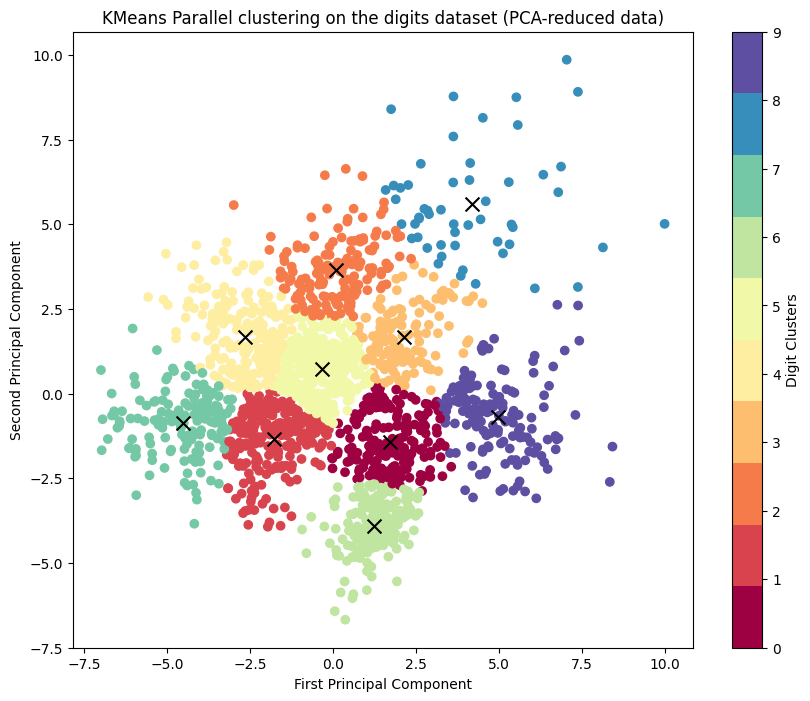

In [ ]:
#KMEANS PARALLEL ALGORITHM

import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def kmeans_parallel(X, k, l=None, r=5):

    if l is None:
      l = 2*k
    n, d = X.shape

    # initialize an empty set of centers C
    C = np.empty((0, d))

    # Initial cneter is chosen randomly
    initial_index = np.random.choice(n)
    C = np.vstack([C, X[initial_index]])

    for _ in range(r):
        # Compute distances from each point to the nearest center in C
        dist = np.min(euclidean_distances(X, C), axis=1)

        # Probability for each point to be chosen as a center is calculated
        probabilities = dist**2 / np.sum(dist**2)

        # Sample 'l' points as new centers based on the probabilities calculated in the above step
        new_centers_indices = np.random.choice(n, size=l, replace=True, p=probabilities)
        C = np.vstack([C, X[new_centers_indices]])



    # Step 2: Refining the set of 'l'*'r' centers to k centers using kmeans++ after 'r' rounds.
    final_kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1, max_iter=300)
    final_kmeans.fit(C)

    # We then utilize the refined centers to perform final k-means clustering on the original dataset
    final_kmeans = KMeans(n_clusters=k, init=final_kmeans.cluster_centers_, n_init=1, max_iter=300)
    final_kmeans.fit(X)

    return final_kmeans

# Use this on the dataset that was reduced in the earlier code when using PCA
n_digits = 10  # This is k in k-means
kmeans_result = kmeans_parallel(reduced_data, n_digits)

# Calculating Silhouette Score
score_parallel = silhouette_score(reduced_data, kmeans_result.labels_)
print("Silhouette Score for KMeans Parallel:", score_parallel)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_result.labels_, cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='Digit Clusters')
plt.scatter(kmeans_result.cluster_centers_[:, 0], kmeans_result.cluster_centers_[:, 1], marker='x', color='k', s=100)
plt.title('KMeans Parallel clustering on the digits dataset (PCA-reduced data)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


Results of Kmeans Parallel
- Silhouette Score - 0.3789 - this score is slightly higher than that for Kmeans++ indicating that this algorithm performed the clustering process slightly better than that of Kmeans++.

- Plot - We can clearly see 10 defined clusters and they are distinct as well, indicating that the algorithm performed the clustering process efficiently.

We also run the normal Kmeans Algorithm on the dataset in order to figure out how the results vary among Kmeans, Kmeans++ and Kmeans parallel.

## **NORMAL KMEANS ALGORITHM ON THE MNSIT DATASET**

Silhouette Score for normal KMeans: 0.37616810399566414


<ipython-input-16-dae812dab34c>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral', 10))


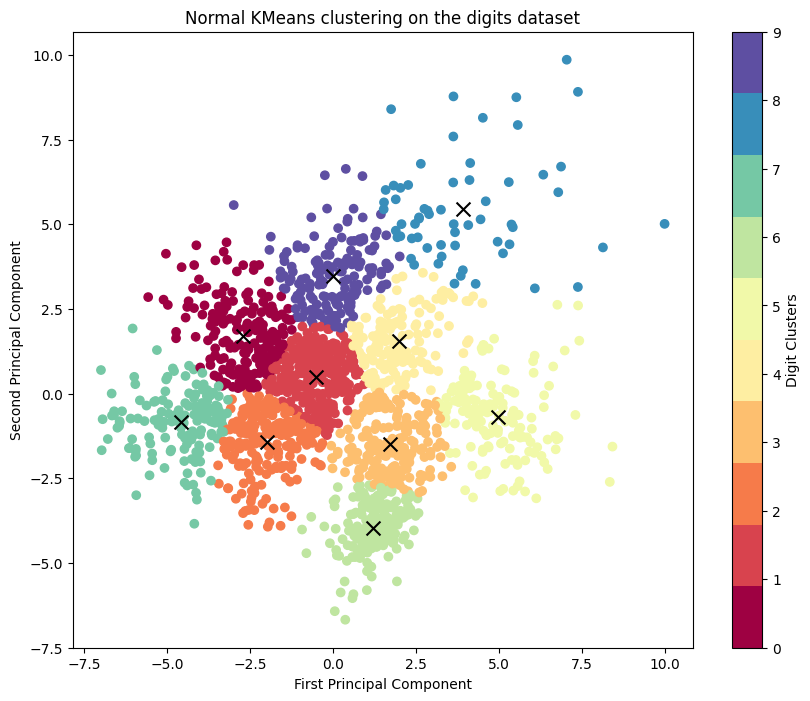

In [ ]:
#NORMAL KMEANS ALGORITHM

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score


np.random.seed(42)
digits = load_digits()
data = scale(digits.data)
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target
reduced_data_k = PCA(n_components=2).fit_transform(data)
kmeans_normal = KMeans(n_clusters=n_digits, n_init=10)
kmeans_normal.fit(reduced_data_k)
centroids_normal = kmeans_normal.cluster_centers_
score_normal = silhouette_score(reduced_data_k, kmeans_normal.labels_)
print("Silhouette Score for normal KMeans:", score_normal)
# Plotting the PCA-reduced data colored by KMeans labels
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data_k[:, 1], c=kmeans_normal.labels_,
                       cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='Digit Clusters')  # Add color bar to indicate cluster colors
plt.scatter(centroids_normal[:, 0], centroids_normal[:, 1], marker='x', color='k', s=100)
plt.title('Normal KMeans clustering on the digits dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


We also partitioned the clusters using the probabilistic model of Gaussian Mixture Models to compare the performance of K-means with other models.

## **COMPARISON OF KMEANS++/KMEANS PARALLEL/KMEANS (WITHOUT PCA) WITH GMM ALGORITHM FOR THE MNSIT DATASET**

K-means (Random) Metrics:
Average iteration time: 0.0574 seconds
Total iterations: 19
Silhouette Score: 0.1430

K-means++ Metrics:
Average iteration time: 0.0597 seconds
Total iterations: 27
Silhouette Score: 0.1439

Gaussian Mixture Model Metrics:
Time to fit: 2.9650 seconds
Silhouette Score: 0.1263

K-means|| Metrics:
Average iteration time: 0.0239 seconds
Total iterations: 21
Silhouette Score: 0.1383


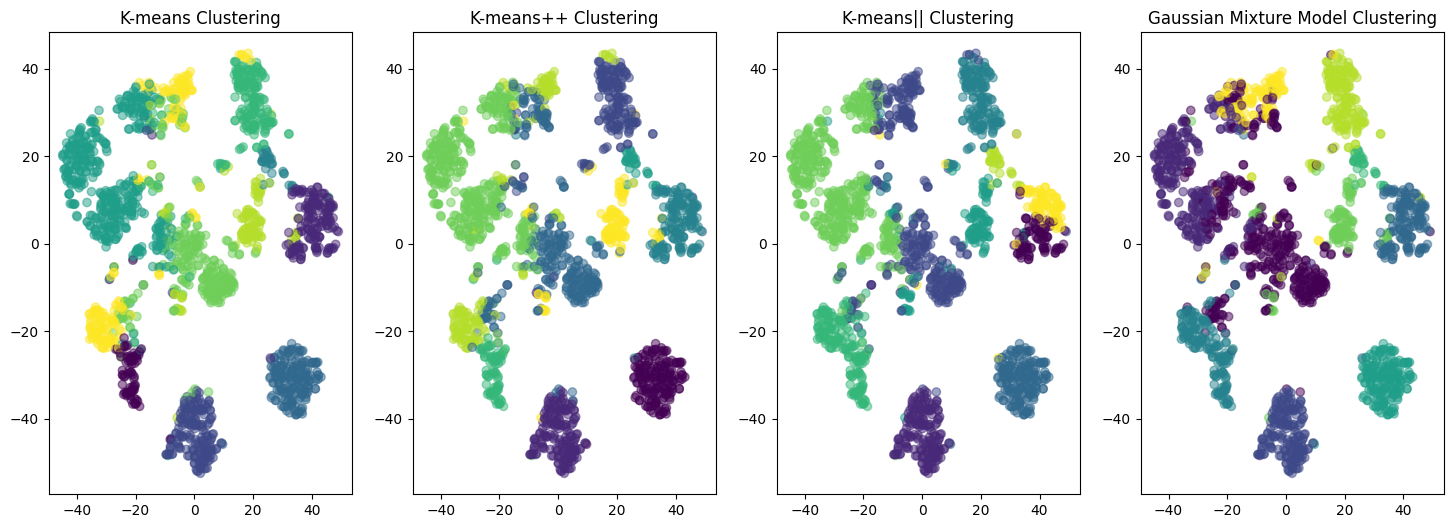

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import time

# Load MNIST data and scale it
digits = datasets.load_digits()
X = digits.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Number of clusters
n_clusters = 10

# Define K-means||
def kmeans_parallel(X, k, l=None, r=5):
    if l is None:
        l = 2 * k  # More samples for initial centroids
    n, _ = X.shape
    np.random.seed(42)
    centroids = X[np.random.choice(n, 1), :]
    for i in range(r):
        distances = np.min(((X - centroids[:, np.newaxis])**2).sum(axis=2), axis=0)
        probs = distances / distances.sum()
        new_indices = np.random.choice(n, l, replace=False, p=probs)
        centroids = np.vstack([centroids, X[new_indices]])
    final_kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1)
    return final_kmeans

# Initialize and fit K-means with random initialization
start_time = time.time()
kmeans = KMeans(n_clusters=n_clusters, init='random', n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
end_time = time.time()
kmeans_time = end_time - start_time
kmeans_iter = kmeans.n_iter_

# Initialize and fit K-means++
start_time = time.time()
kmeans_plus = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=42)
kmeans_plus_labels = kmeans_plus.fit_predict(X_scaled)
end_time = time.time()
kmeans_plus_time = end_time - start_time
kmeans_plus_iter = kmeans_plus.n_iter_

# Initialize and fit Gaussian Mixture Model
start_time = time.time()
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
end_time = time.time()
gmm_time = end_time - start_time

# Initialize and fit K-means||
start_time = time.time()
kmeans_parallel_model = kmeans_parallel(X_scaled, n_clusters)
kmeans_parallel_labels = kmeans_parallel_model.fit_predict(X_scaled)
end_time = time.time()
kmeans_parallel_time = end_time - start_time
kmeans_parallel_iter = kmeans_parallel_model.n_iter_

# Calculate Silhouette Scores
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
silhouette_kmeans_plus = silhouette_score(X_scaled, kmeans_plus_labels)
silhouette_gmm = silhouette_score(X_scaled, gmm_labels)
silhouette_kmeans_parallel = silhouette_score(X_scaled, kmeans_parallel_labels)

# Print results
print("K-means (Random) Metrics:")
print(f"Average iteration time: {kmeans_time / kmeans_iter:.4f} seconds")
print(f"Total iterations: {kmeans_iter}")
print(f"Silhouette Score: {silhouette_kmeans:.4f}")

print("\nK-means++ Metrics:")
print(f"Average iteration time: {kmeans_plus_time / kmeans_plus_iter:.4f} seconds")
print(f"Total iterations: {kmeans_plus_iter}")
print(f"Silhouette Score: {silhouette_kmeans_plus:.4f}")

print("\nGaussian Mixture Model Metrics:")
print(f"Time to fit: {gmm_time:.4f} seconds")
print(f"Silhouette Score: {silhouette_gmm:.4f}")

print("\nK-means|| Metrics:")
print(f"Average iteration time: {kmeans_parallel_time / kmeans_parallel_iter:.4f} seconds")
print(f"Total iterations: {kmeans_parallel_iter}")
print(f"Silhouette Score: {silhouette_kmeans_parallel:.4f}")

# Visualization using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(18, 6))
plt.subplot(141)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('K-means Clustering')

plt.subplot(142)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_plus_labels, cmap='viridis', alpha=0.5)
plt.title('K-means++ Clustering')

plt.subplot(143)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_parallel_labels, cmap='viridis', alpha=0.5)
plt.title('K-means|| Clustering')

plt.subplot(144)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=gmm_labels, cmap='viridis', alpha=0.5)
plt.title('Gaussian Mixture Model Clustering')

plt.show()

From the above clustering we observe that K-means demonstrated superior efficiency and faster convergence compared to the Gaussian Mixture Model (GMM). K-means and K-means++ had similar Silhouette Scores around 0.14, with K-means++ slightly outperforming in clustering quality. Conversely, GMM took significantly longer to fit (9.774 seconds) and produced the lowest Silhouette Score of 0.1179, indicating a mismatch between the model’s complexity and the dataset’s characteristics.

From the observed results we can see that
- Silhouette Score - 0.376 - which shows that the normal Kmeans clustering algorithm also performed well

## **KMEANS++ ON THE WINE DATASET**

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

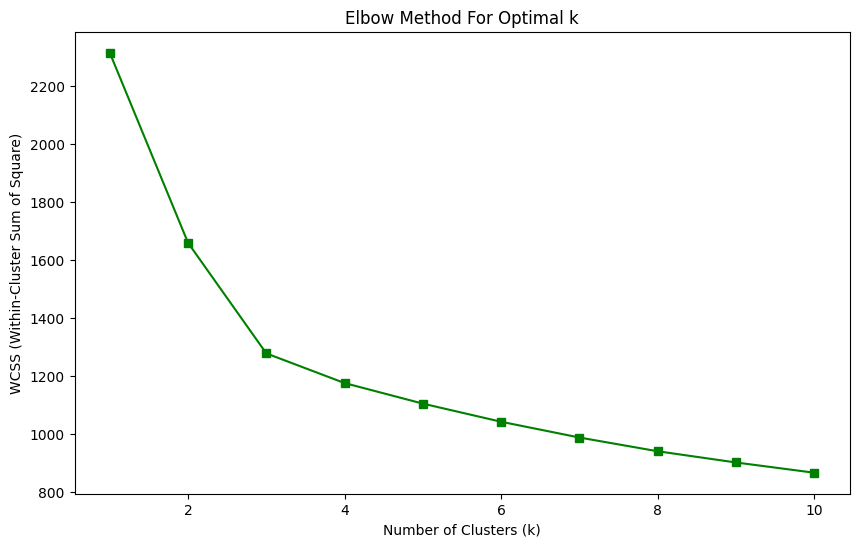

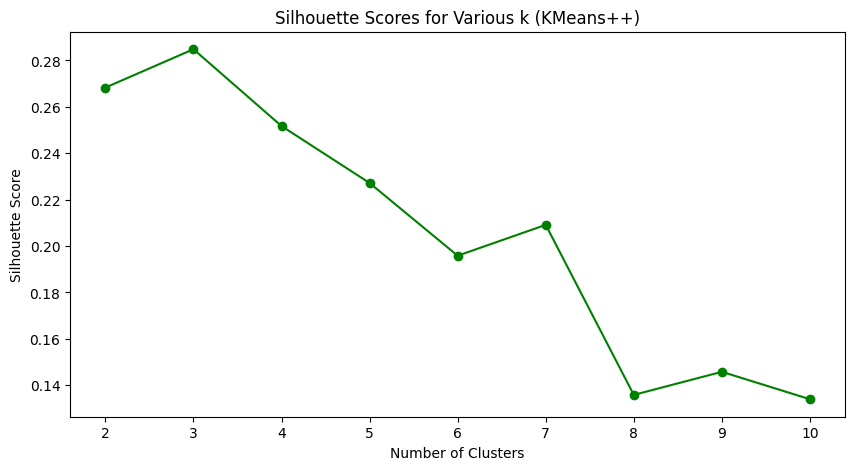

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


       PCA1      PCA2
0  3.316751 -1.443463
1  2.209465  0.333393
2  2.516740 -1.031151
3  3.757066 -2.756372
4  1.008908 -0.869831
Silhouette Score for k-means++: 0.13394527355239233


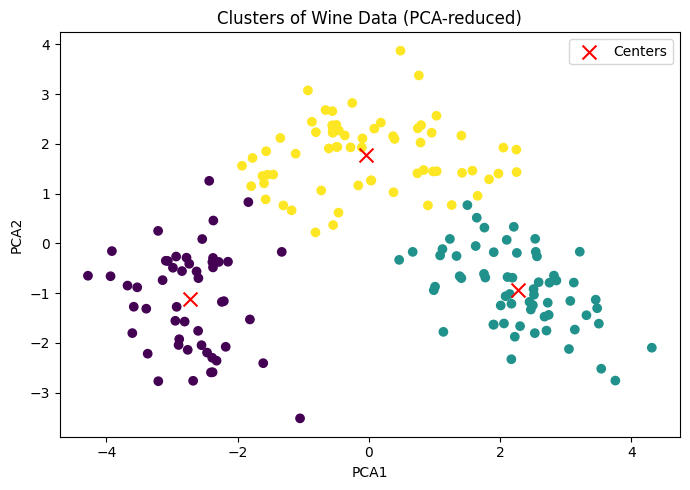

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the Wine dataset with feature frame
wine_data = load_wine(as_frame=True)
wine_df = wine_data.frame
print(wine_df.head())

# Drop the target column
wine_df.drop('target', axis=1, inplace=True)

# Standardize the dataset
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wine_df)

# Convert scaled features back to DataFrame
wine_scaled_df = pd.DataFrame(scaled_features, columns=wine_df.columns)
print(wine_scaled_df.head(2))

# Prepare data for clustering
X = wine_scaled_df.values

# Calculate WCSS  for different values of 'k'
wcss = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss[i] = kmeans.inertia_

silhouette_scores = {}
for k in range(2, 11):  # Starting from 2 clusters to avoid division by zero in silhouette score
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(wine_scaled_df)
    wcss[k] = kmeans.inertia_
    silhouette_scores[k] = silhouette_score(wine_scaled_df, labels)

# Plotting the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(list(wcss.keys()), list(wcss.values()), 'gs-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel('WCSS (Within-Cluster Sum of Square)')
plt.title('Elbow Method For Optimal k')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), 'go-')
plt.title('Silhouette Scores for Various k (KMeans++)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


# Apply KMeans clustering with 3 clusters
kmeans_model = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_model.fit(X)

# Apply PCA to reduce dimensions to 2 for better observation
pca = PCA(n_components=2)
reduced_X = pd.DataFrame(pca.fit_transform(X), columns=['PCA1', 'PCA2'])
print(reduced_X.head())

# Transform cluster centers to the PCA-reduced space
reduced_centers = pca.transform(kmeans_model.cluster_centers_)

# Calculate the Silhouette Score
silhouette_kmeansplusplus = silhouette_score(wine_scaled_df, labels)
print(f"Silhouette Score for k-means++: {silhouette_kmeansplusplus}")

# Plotting the clusters and their centers
plt.figure(figsize=(7, 5))
plt.scatter(reduced_X['PCA1'], reduced_X['PCA2'], c=kmeans_model.labels_, cmap='viridis')
plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], marker='x', s=100, c='red', label='Centers')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters of Wine Data (PCA-reduced)')
plt.legend()
plt.tight_layout()
plt.show()


## **KMEANS PARALLEL ALGORITHM ON THE WINE DATASET**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for k-meansk: 0.28594199657074876
Average iteration time: 0.21157 seconds
Total number of iterations: 85


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


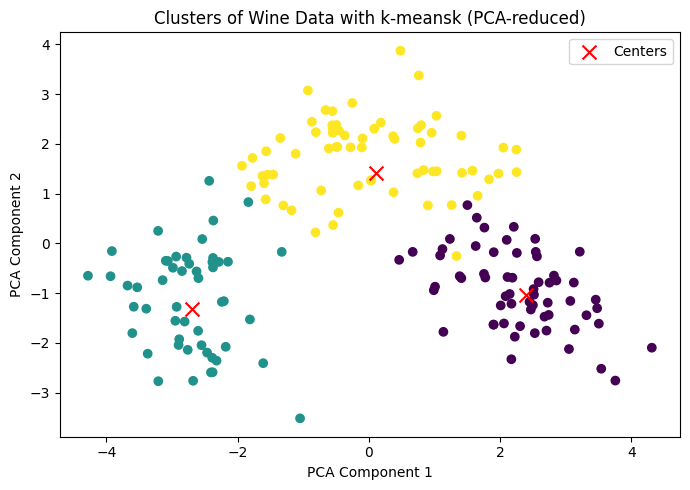

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import time

# Load the Wine dataset
wine_data = load_wine(as_frame=True)
wine_df = wine_data.frame
wine_df.drop('target', axis=1, inplace=True)  # Drop the target column for unsupervised learning

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wine_df)
wine_scaled_df = pd.DataFrame(scaled_features, columns=wine_df.columns)

# Set the parameters for k-meansk
k = 3  # Number of clusters
T = 5  # Number of rounds
l = k * 2  # Oversampling factor

# empty array to store potential centers
potential_centers = []

# Variables to track iteration times and counts
iteration_times = []
total_iterations = 0

# Simulate the k-meansk seeding process
for _ in range(T):
    start_time = time.time()
    kmeans = KMeans(n_clusters=l, init='k-means++', random_state=42)
    kmeans.fit(wine_scaled_df)
    end_time = time.time()

    potential_centers.extend(kmeans.cluster_centers_)
    iteration_times.append(end_time - start_time)
    total_iterations += kmeans.n_iter_

# Average iteration time calculation
average_iteration_time = sum(iteration_times) / len(iteration_times)

# Select k centers from the potential centers using k-means++
final_kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
final_kmeans.fit(potential_centers)  # This step prunes the centers to the desired number

# Cluster the original data using the selected centers
labels = KMeans(n_clusters=k, init=final_kmeans.cluster_centers_, n_init=1).fit_predict(wine_scaled_df)

# Calculate the Silhouette Score
silhouette_kmeansk = silhouette_score(wine_scaled_df, labels)
print(f"Silhouette Score for k-meansk: {silhouette_kmeansk}")

# Print average iternation time and total number of iterations
print(f"Average iteration time: {average_iteration_time:.5f} seconds")
print(f"Total number of iterations: {total_iterations}")

# Applying PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(wine_scaled_df)
reduced_centers = pca.transform(final_kmeans.cluster_centers_)

# Plotting the clusters
plt.figure(figsize=(7, 5))
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=labels, cmap='viridis')
plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], marker='x', s=100, c='red', label='Centers')
plt.title('Clusters of Wine Data with k-meansk (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.tight_layout()
plt.show()


## **NORMAL KMEANS ON THE WINE DATASET**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Silhouette Score for normal KMeans: 0.2848589191898987


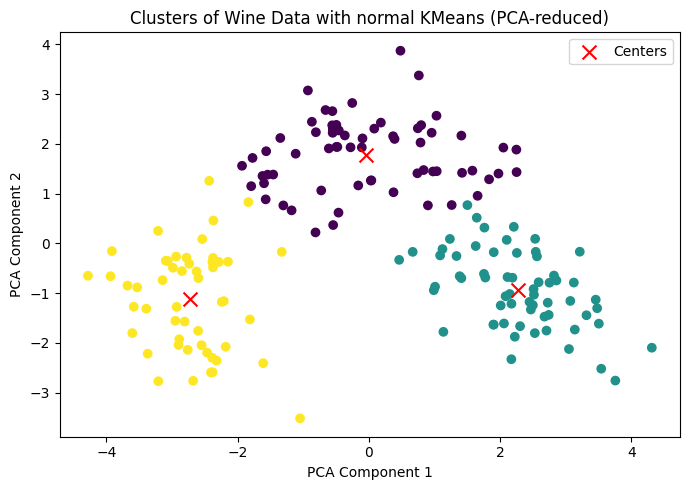

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load the Wine dataset
wine_data = load_wine(as_frame=True)
wine_df = wine_data.frame
wine_df.drop('target', axis=1, inplace=True)  # Drop the target column for unsupervised learning

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wine_df)
wine_scaled_df = pd.DataFrame(scaled_features, columns=wine_df.columns)

# Perform KMeans clustering with 3 clusters
kmeans_normal = KMeans(n_clusters=3, init='random', random_state=42)
kmeans_normal.fit(wine_scaled_df)

# Calculate the Silhouette Score
silhouette_normal = silhouette_score(wine_scaled_df, kmeans_normal.labels_)
print(f"Silhouette Score for normal KMeans: {silhouette_normal}")

# Applying PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(wine_scaled_df)
reduced_centers = pca.transform(kmeans_normal.cluster_centers_)

# Plotting the clusters
plt.figure(figsize=(7, 5))
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=kmeans_normal.labels_, cmap='viridis')
plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], marker='x', s=100, c='red', label='Centers')
plt.title('Clusters of Wine Data with normal KMeans (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.tight_layout()
plt.show()


Silhouette Score for Gaussian Mixture Model: 0.2844212860533542
Model converged in 2 iterations.


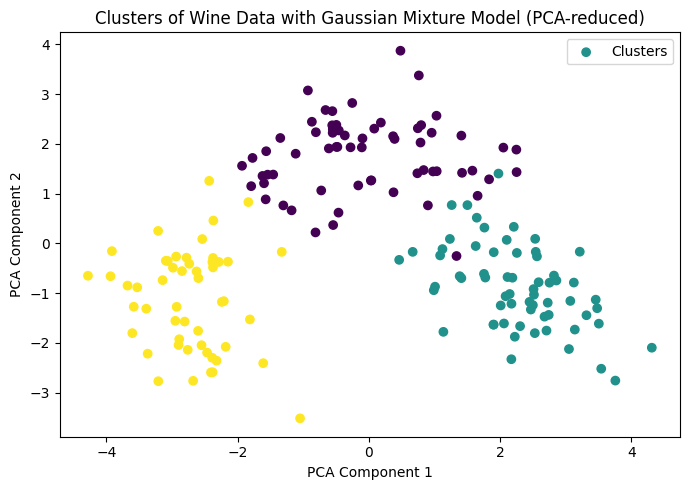

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load the Wine dataset
wine_data = load_wine(as_frame=True)
wine_df = wine_data.frame
wine_df.drop('target', axis=1, inplace=True)  # Drop the target column for unsupervised learning

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wine_df)
wine_scaled_df = pd.DataFrame(scaled_features, columns=wine_df.columns)

# Perform clustering with Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(wine_scaled_df)
gmm_labels = gmm.predict(wine_scaled_df)

# Calculate the Silhouette Score for the clustering
silhouette_gmm = silhouette_score(wine_scaled_df, gmm_labels)
print(f"Silhouette Score for Gaussian Mixture Model: {silhouette_gmm}")

# Check if the model has converged
if gmm.converged_:
    print(f"Model converged in {gmm.n_iter_} iterations.")
else:
    print("Model did not converge.")

# Applying PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(wine_scaled_df)

# Plotting the clusters
plt.figure(figsize=(7, 5))
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=gmm_labels, cmap='viridis', label='Clusters')
plt.title('Clusters of Wine Data with Gaussian Mixture Model (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.tight_layout()
plt.show()


## **KMEANS++ ON THE IRIS DATASET**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


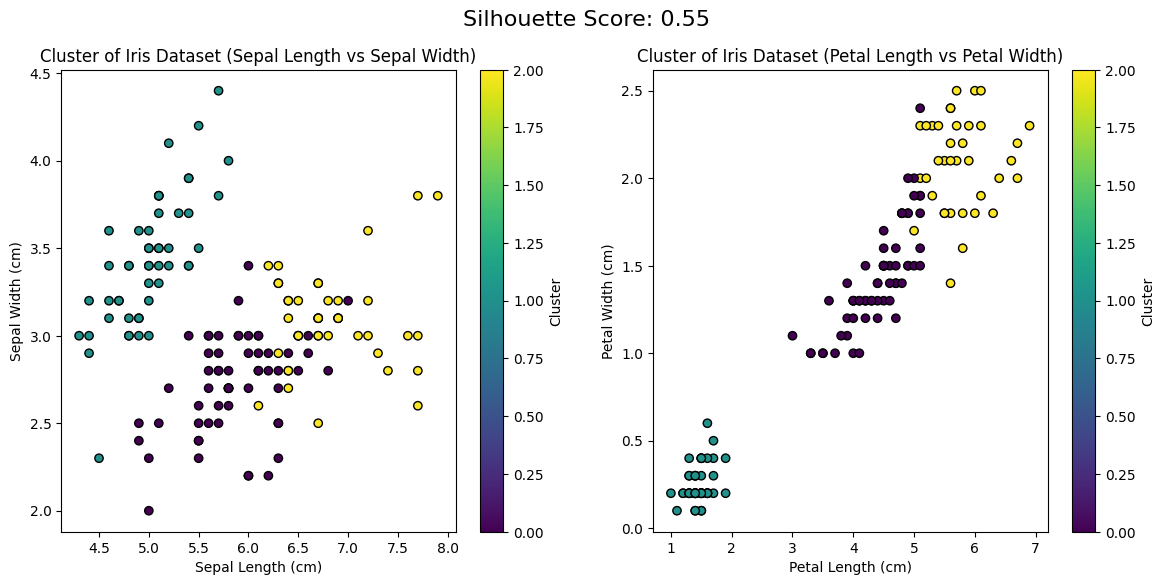

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load the dataset
iris = datasets.load_iris()
X_iris = iris.data

# Apply k-means clustering
kmeans_iris = KMeans(n_clusters=3, init='k-means++', random_state=42)
iris_clusters = kmeans_iris.fit_predict(X_iris)

# Compute the silhouette score
silhouette_avg = silhouette_score(X_iris, iris_clusters)

# Plotting the clusters for sepal length and sepal width
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=iris_clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('Cluster of Iris Dataset (Sepal Length vs Sepal Width)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(label='Cluster')

# Plotting the clusters for petal length and petal width
plt.subplot(1, 2, 2)
plt.scatter(X_iris[:, 2], X_iris[:, 3], c=iris_clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('Cluster of Iris Dataset (Petal Length vs Petal Width)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.colorbar(label='Cluster')

# Display the silhouette score
plt.suptitle(f'Silhouette Score: {silhouette_avg:.2f}', fontsize=16)
plt.show()

plt.show()


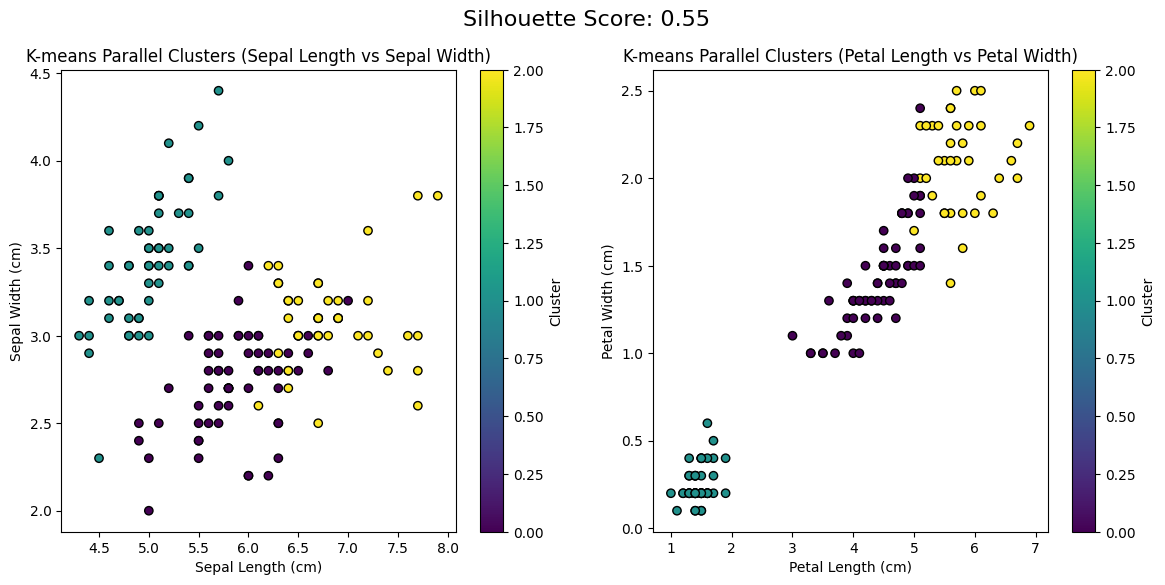

In [ ]:
# Applying k-means with increased n_init to simulate k-means parallel
kmeans_parallel_iris = KMeans(n_clusters=3, init='k-means++', n_init=20, random_state=42)
parallel_iris_clusters = kmeans_parallel_iris.fit_predict(X_iris)

# Plotting the parallel clusters for sepal length and sepal width
plt.figure(figsize=(14, 6))

# Calculate the silhouette score
silhouette_avg_1 = silhouette_score(X_iris, iris_clusters)
plt.subplot(1, 2, 1)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=parallel_iris_clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('K-means Parallel Clusters (Sepal Length vs Sepal Width)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(label='Cluster')

# Plotting the parallel clusters for petal length and petal width
plt.subplot(1, 2, 2)
plt.scatter(X_iris[:, 2], X_iris[:, 3], c=parallel_iris_clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('K-means Parallel Clusters (Petal Length vs Petal Width)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.colorbar(label='Cluster')

# Display the silhouette score
plt.suptitle(f'Silhouette Score: {silhouette_avg_1:.2f}', fontsize=16)
plt.show()

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


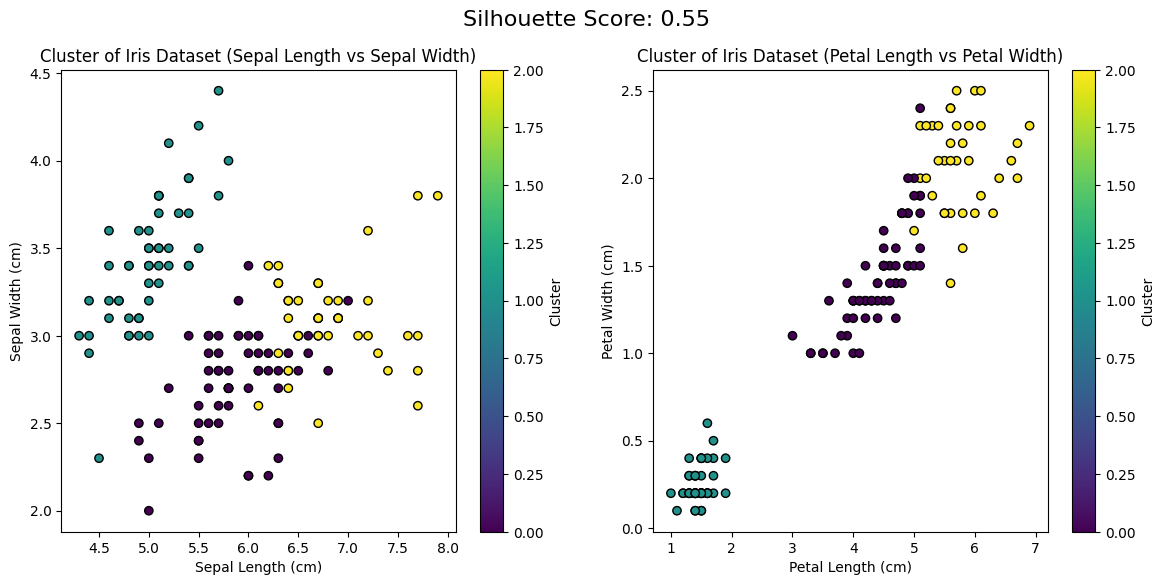

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
X_iris = iris.data

# Apply k-means clustering
kmeans_iris = KMeans(n_clusters=3, random_state=42)
iris_clusters = kmeans_iris.fit_predict(X_iris)

# Compute the silhouette score
silhouette_avg = silhouette_score(X_iris, iris_clusters)

# Plotting the clusters for sepal length and sepal width
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=iris_clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('Cluster of Iris Dataset (Sepal Length vs Sepal Width)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(label='Cluster')

# Plotting the clusters for petal length and petal width
plt.subplot(1, 2, 2)
plt.scatter(X_iris[:, 2], X_iris[:, 3], c=iris_clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('Cluster of Iris Dataset (Petal Length vs Petal Width)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.colorbar(label='Cluster')

# Display the silhouette score
plt.suptitle(f'Silhouette Score: {silhouette_avg:.2f}', fontsize=16)
plt.show()


Gaussian Mixture Models for Iris

## **COMPARING KMEANS++/KMEANS PARALLEL/KMEANS NORMAL ALGORITHM(WITHOUT PCA) WITH GMM ON THE IRIS DATASET**

Silhouette Score for K-means (Random): 0.46
Silhouette Score for K-means++: 0.46
Silhouette Score for Gaussian Mixture Model: 0.37
Silhouette Score for K-means||: 0.46


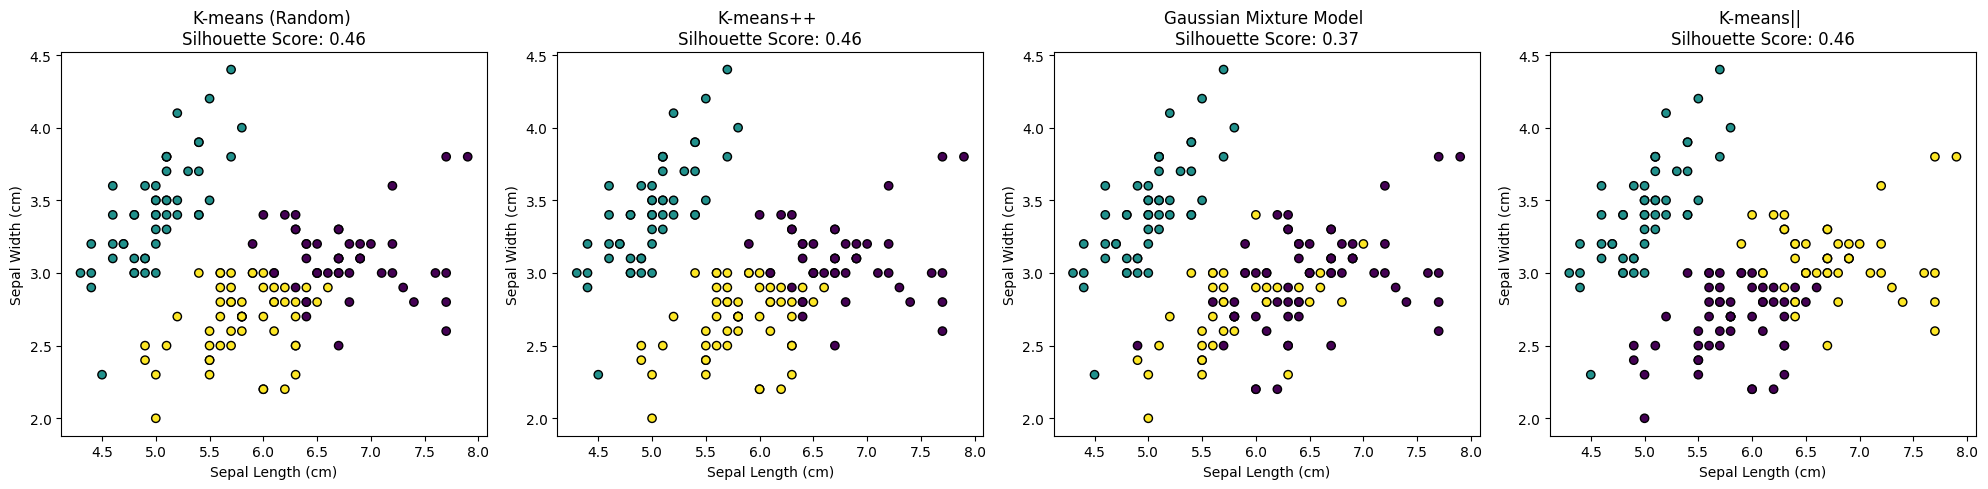

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
iris = datasets.load_iris()
X_iris = iris.data

# Standardize the features
scaler = StandardScaler()
X_scaled_iris = scaler.fit_transform(X_iris)

# Number of clusters
n_clusters = 3
k = 3

# Define a simplified K-means|| function
def kmeans_parallel(X, k, l=2*k, r=5):
    np.random.seed(42)
    n = X.shape[0]
    centroids = X[np.random.choice(n, 1), :]
    for _ in range(r):
        distances = np.min(((X - centroids[:, np.newaxis])**2).sum(axis=2), axis=0)
        probs = distances / np.sum(distances)
        new_centroids = X[np.random.choice(n, l, replace=False, p=probs), :]
        centroids = np.vstack([centroids, new_centroids])
    # Use K-means++ initialization with these centroids
    final_kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1)
    final_kmeans.fit(X)
    return final_kmeans.labels_

# Apply K-means with random initialization
kmeans_iris = KMeans(n_clusters=n_clusters, init='random', n_init=10, random_state=42)
iris_clusters_kmeans = kmeans_iris.fit_predict(X_scaled_iris)

# Apply K-means with K-means++ initialization
kmeans_plus_iris = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=42)
iris_clusters_kmeans_plus = kmeans_plus_iris.fit_predict(X_scaled_iris)

# Apply Gaussian Mixture Model
gmm_iris = GaussianMixture(n_components=n_clusters, random_state=42)
iris_clusters_gmm = gmm_iris.fit_predict(X_scaled_iris)

# Apply K-means parallel
iris_clusters_kmeans_parallel = kmeans_parallel(X_scaled_iris, n_clusters)

# Calculate the silhouette scores
silhouette_kmeans = silhouette_score(X_scaled_iris, iris_clusters_kmeans)
silhouette_kmeans_plus = silhouette_score(X_scaled_iris, iris_clusters_kmeans_plus)
silhouette_gmm = silhouette_score(X_scaled_iris, iris_clusters_gmm)
silhouette_kmeans_parallel = silhouette_score(X_scaled_iris, iris_clusters_kmeans_parallel)

# Print the silhouette scores
print(f"Silhouette Score for K-means (Random): {silhouette_kmeans:.2f}")
print(f"Silhouette Score for K-means++: {silhouette_kmeans_plus:.2f}")
print(f"Silhouette Score for Gaussian Mixture Model: {silhouette_gmm:.2f}")
print(f"Silhouette Score for K-means||: {silhouette_kmeans_parallel:.2f}")

# Plotting clusters for visualization
plt.figure(figsize=(20, 5))

# K-means Random Initialization
plt.subplot(1, 4, 1)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=iris_clusters_kmeans, cmap='viridis', marker='o', edgecolor='k')
plt.title(f'K-means (Random) \nSilhouette Score: {silhouette_kmeans:.2f}')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# K-means++ Initialization
plt.subplot(1, 4, 2)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=iris_clusters_kmeans_plus, cmap='viridis', marker='o', edgecolor='k')
plt.title(f'K-means++ \nSilhouette Score: {silhouette_kmeans_plus:.2f}')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# Gaussian Mixture Model
plt.subplot(1, 4, 3)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=iris_clusters_gmm, cmap='viridis', marker='o', edgecolor='k')
plt.title(f'Gaussian Mixture Model \nSilhouette Score: {silhouette_gmm:.2f}')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# K-means parallel
plt.subplot(1, 4, 4)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=iris_clusters_kmeans_parallel, cmap='viridis', marker='o', edgecolor='k')
plt.title(f'K-means|| \nSilhouette Score: {silhouette_kmeans_parallel:.2f}')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

plt.tight_layout()
plt.show()
